Environment setup: 
            Path length: 6 m
            Number of obstacles: 8
            ATR max velocity: 0.2 m/s
            ATR max wheel speed: 1.6 rad/s
            target finishing time: 30 s
            step time: 0.1 s
            
[[ 2.088 -3.015  0.25 ]
 [-0.507 -5.953  0.25 ]
 [ 1.627 -3.906  0.25 ]
 [ 1.761 -3.887  0.25 ]
 [ 0.983 -4.52   0.25 ]
 [ 0.73  -4.491  0.25 ]
 [ 1.058 -3.887  0.25 ]
 [ 1.5   -3.9    0.25 ]]
[ 0.896 -5.575 -2.973]
[-120. -115. -110. -105. -100.  -95.  -90.  -85.  -80.  -75.  -70.  -65.
  -60.  -55.  -50.  -45.  -40.  -35.  -30.  -25.  -20.  -15.  -10.   -5.
    0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.]


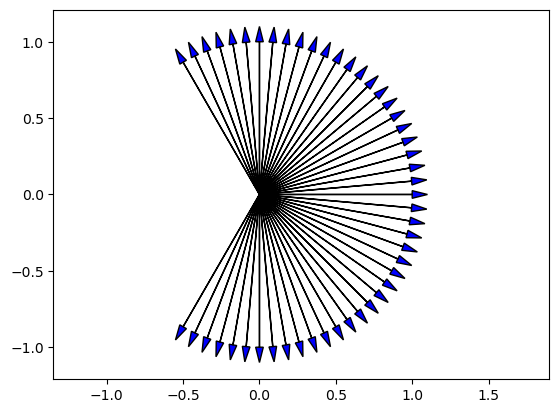

In [27]:
import gymnasium as gym
import pkg_resources
import numpy as np
from factory_env.envs.parameters import env_param
import matplotlib.pyplot as plt
import time

import keyboard
import threading
import multiprocessing
import matplotlib


def print_param(params: env_param):
    print(f"Environment setup: \n\
            Path length: {params.path_param.Lp} m\n\
            Number of obstacles: {params.path_param.Nw}\n\
            ATR max velocity: {params.atr_param.atr_linear_vel_max} m/s\n\
            ATR max wheel speed: {params.atr_param.atr_w_max} rad/s\n\
            target finishing time: {params.path_param.target_finishing_time} s\n\
            step time: {params.atr_param.dt} s\n\
            ")
    
def check_param(params: env_param):
    print_param(params)
    assert params.path_param.target_finishing_time >= params.path_param.Lp / params.atr_param.atr_linear_vel_max, "The target finishing time is too short."

def draw_arrow(ax, x, y, angle, length=1, color='b', alpha=1.0):
            dx = length * np.cos(angle)
            dy = length * np.sin(angle)
            ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc=color, ec='black', alpha=alpha)
            
options = {'init_type': 'load', 'file_name': 'test.pkl'}
# options = {'init_type': 'run', 'file_name': 'test.pkl'}

params:env_param = env_param()
params.atr_param.atr_linear_vel_max = 0.2
params.path_param.target_finishing_time = 30
check_param(params)

env = gym.make('training-factory-v0', params=params,)
next_obs, info = env.reset(options=options)

# action = env.action_space.sample()
# observation, reward, done, truncated, info = env.step(action)

print(env.path.obstacles_np)
print(env.atr.state)

fig, ax = plt.subplots()
min_bound = -np.deg2rad(120)
max_bound = np.deg2rad(120)
r = np.deg2rad(5) # resolution

sensor_angles = np.linspace(min_bound, max_bound, int(np.rint(abs((max_bound - min_bound) / r) + 1)))
for _, angle in enumerate(sensor_angles):
    draw_arrow(ax, 0, 0, angle, 1, 'b', 1.0) 
plt.axis('equal')
print(np.rad2deg(sensor_angles))

# H = [np.cos(theta), -np.sin(theta), 0, 1,
#      np.sin(theta), np.cos(theta), 0, 1,
#      0, 0, 1, 0,
#      0, 0, 0, 1];
# inv(H)*[1;2;0;1]

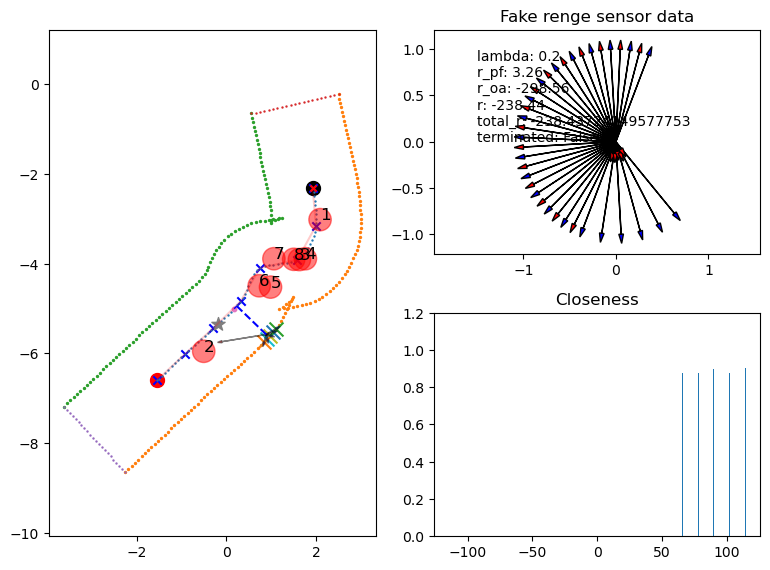

In [18]:
env.render()